In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
import numpy as np

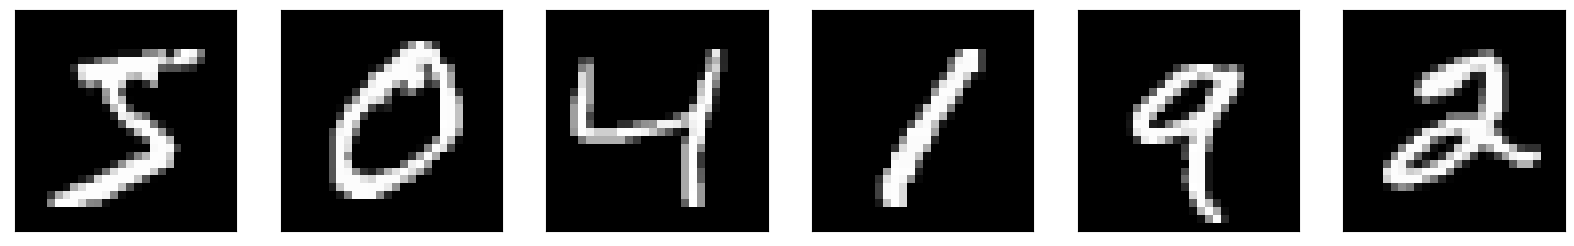

In [5]:
fig=plt.figure(figsize=(20,20))
for i in range(6):
    ax=fig.add_subplot(1,6,i+1,xticks=[],yticks=[]);
    ax.imshow(X_train[i],cmap='gray')

In [6]:
import seaborn as sns

<AxesSubplot: >

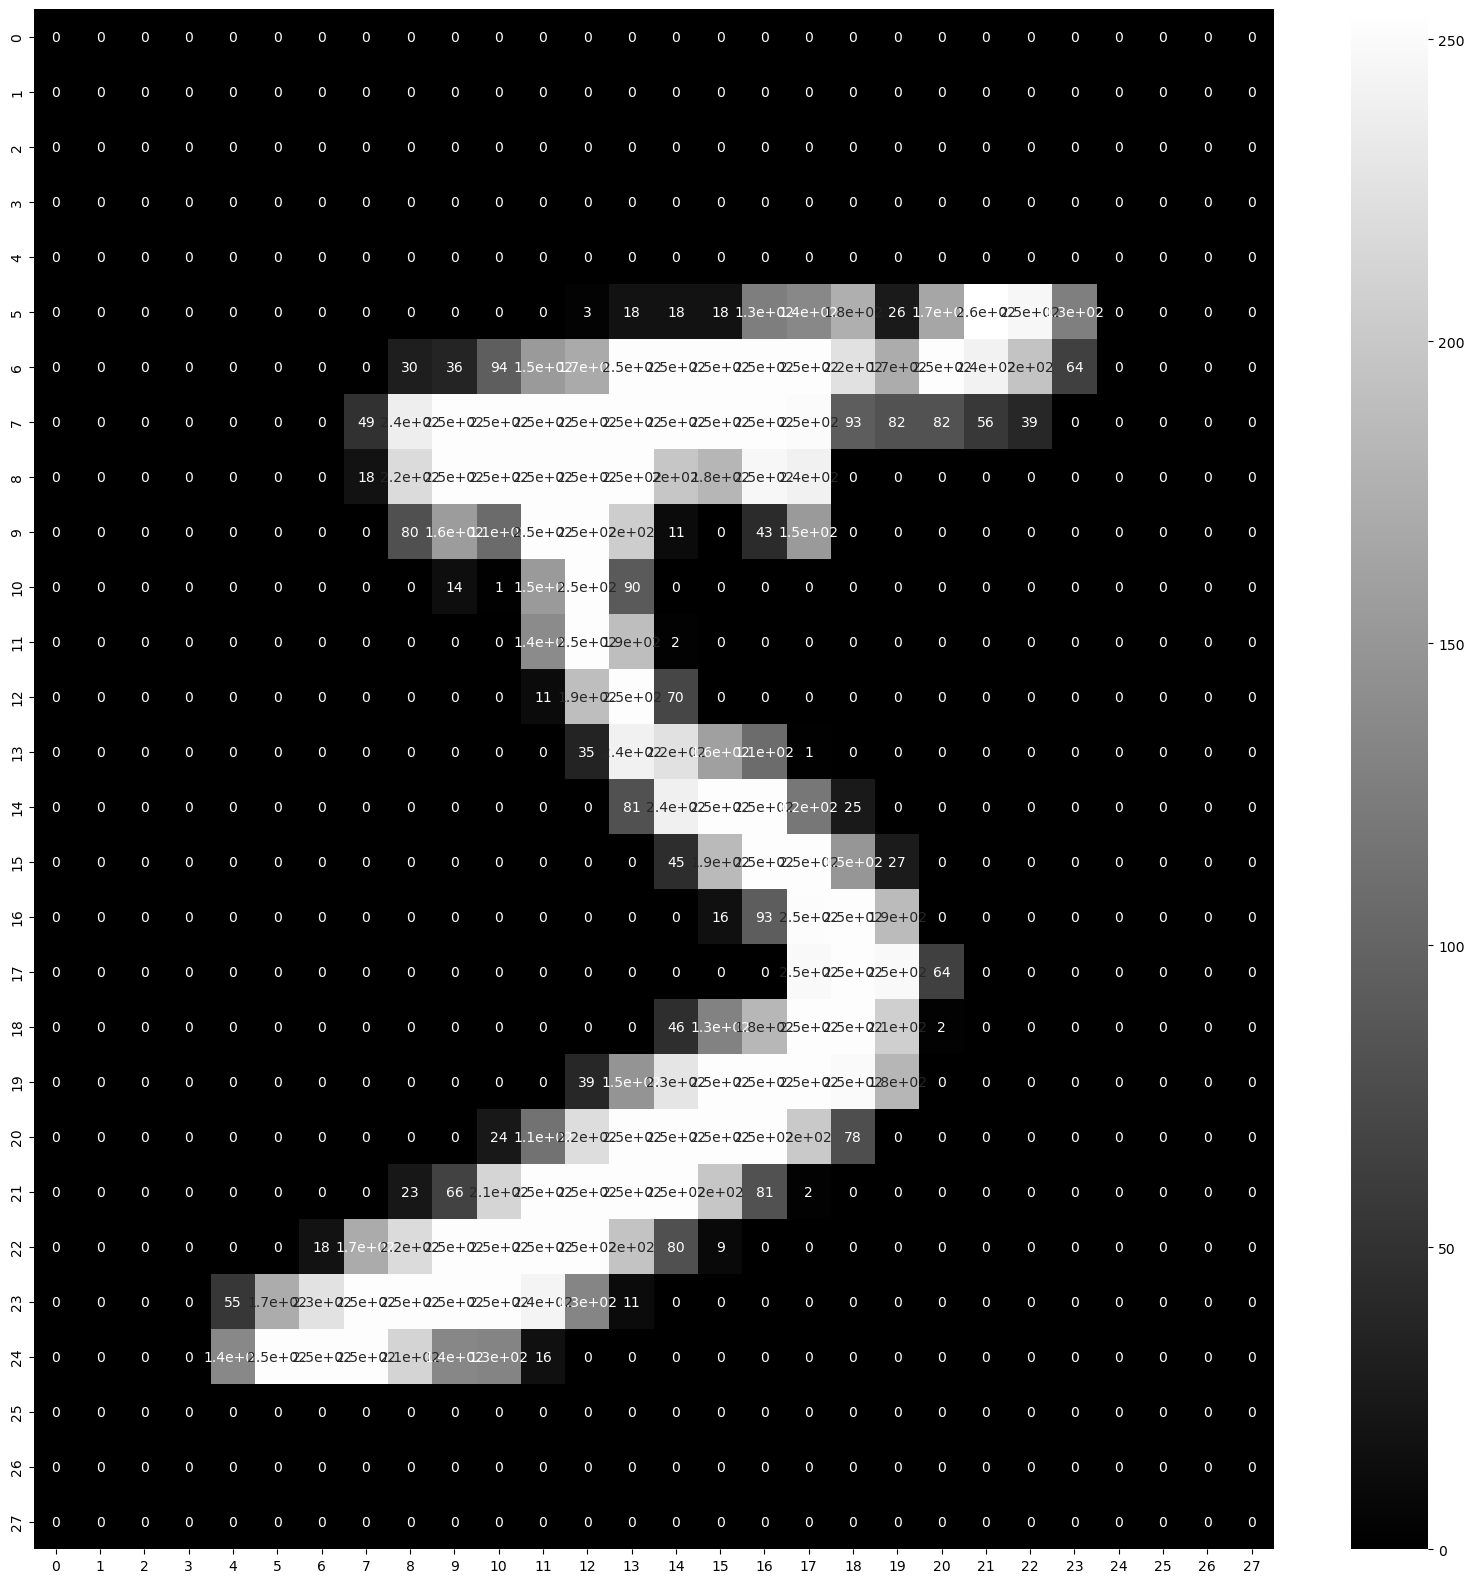

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[0],annot=True,cmap="gray")

In [8]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

<AxesSubplot: >

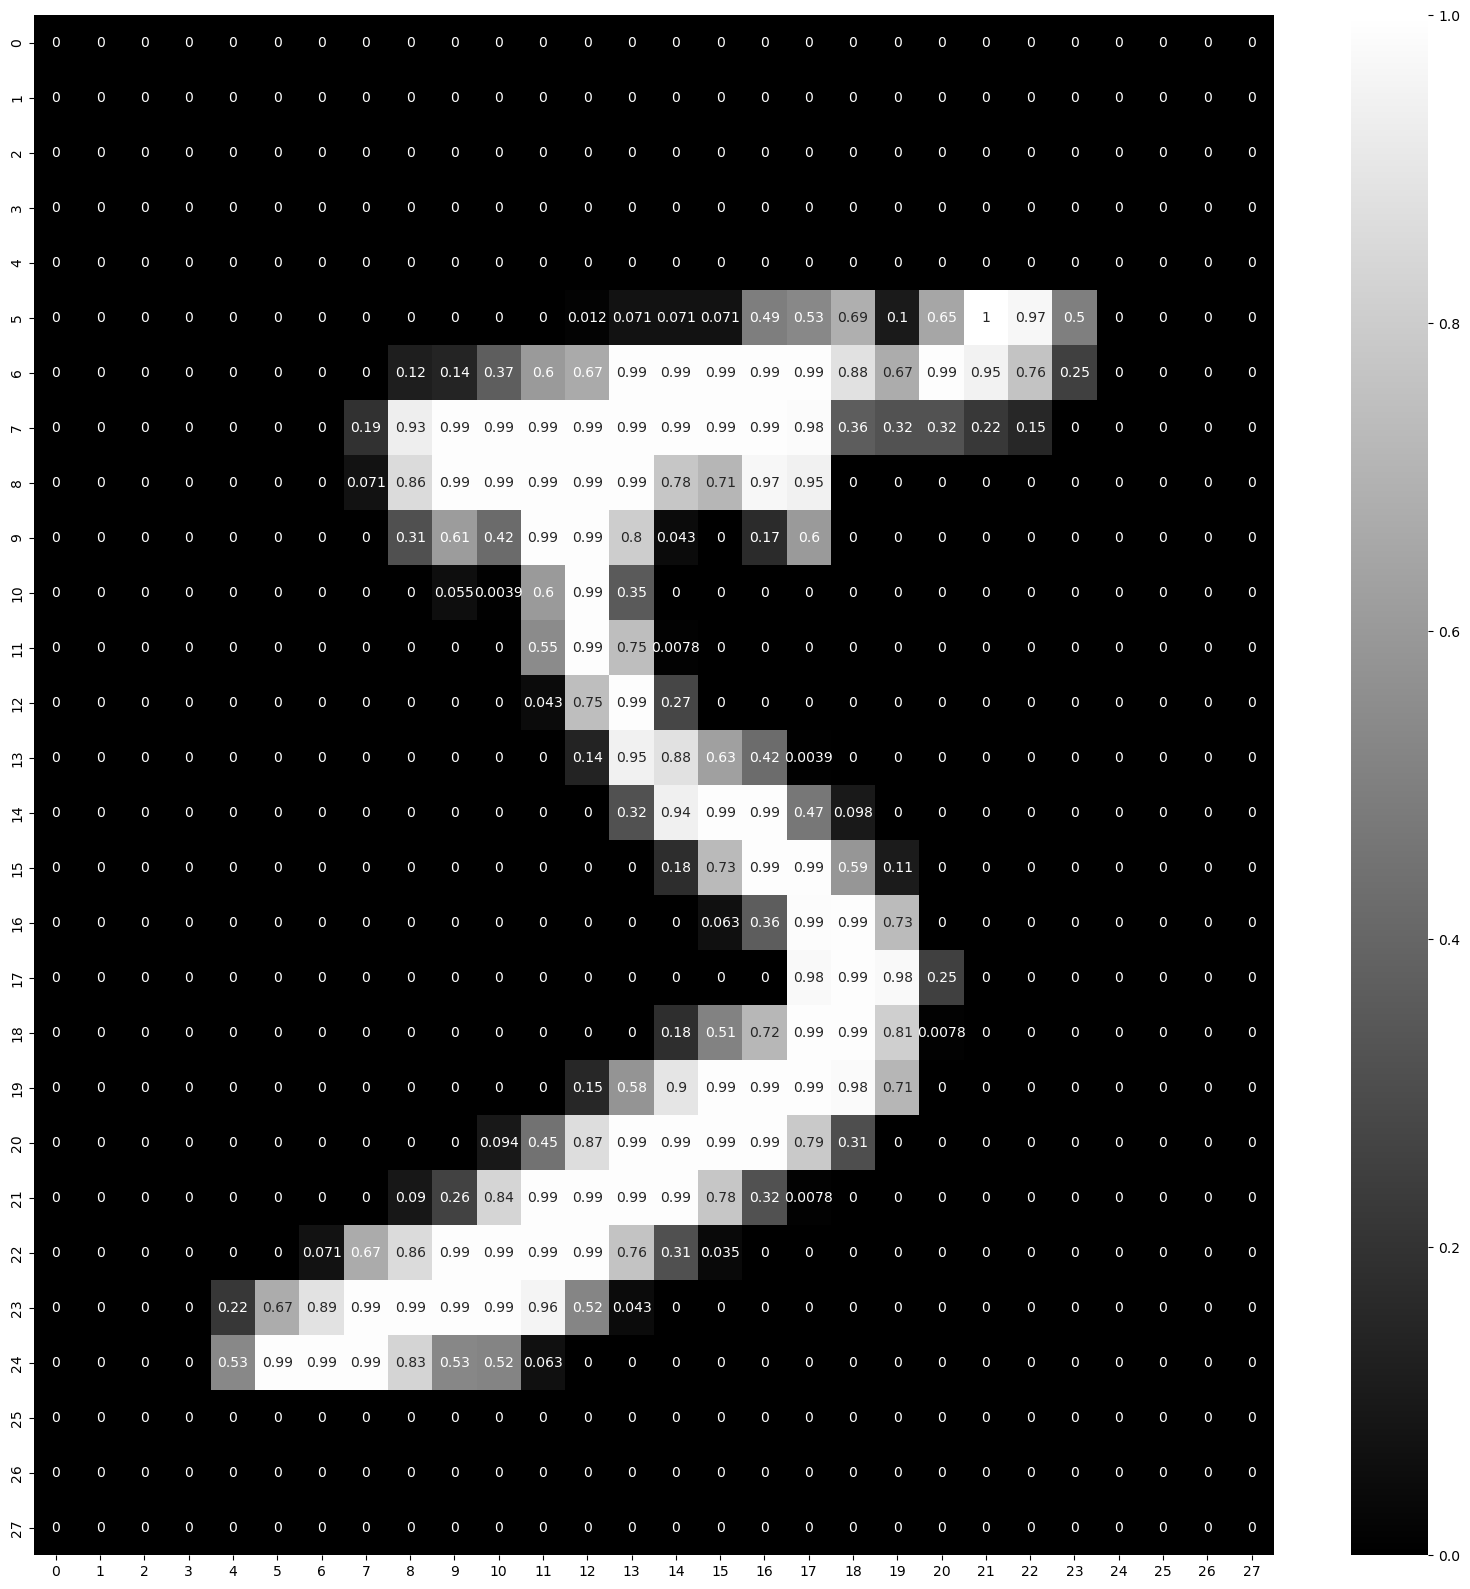

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[0],annot=True,cmap="gray")

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
y_train.shape

(60000,)

In [12]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [13]:

from tensorflow.keras import utils
utils.to_categorical


<function keras.src.utils.np_utils.to_categorical(y, num_classes=None, dtype='float32')>

In [14]:
#OHE



num_classes=10
print('Integer-valued labels')
print(y_train[:10])

y_train=utils.to_categorical(y_train,num_classes)
y_test=utils.to_categorical(y_test,num_classes)
print("OHE")
print(y_train[:10])

Integer-valued labels
[5 0 4 1 9 2 1 3 1 4]
OHE
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [15]:
img_rows,img_cols=28,28
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

In [16]:
X_train.shape

(60000, 28, 28, 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,GlobalAveragePooling2D

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [18]:
#params

# (w of filter*h of filter * no.of fliter in last layer +1)*no. of filter in this layer

(3*3+1)*32

320

In [19]:
(3*3*32+1)*64

18496

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [21]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer=ModelCheckpoint(filepath='model',verbose=1,save_best_only=True)
VALIDATION_SET=(X_test,y_test)
hist=model.fit(X_train,y_train,epochs=10,validation_data=VALIDATION_SET,batch_size=64,callbacks=[checkpointer],verbose=2,
                  shuffle=True)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.04710, saving model to model
INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


938/938 - 13s - loss: 0.1691 - accuracy: 0.9468 - val_loss: 0.0471 - val_accuracy: 0.9835 - 13s/epoch - 14ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.04710 to 0.04339, saving model to model
INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


938/938 - 11s - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0434 - val_accuracy: 0.9863 - 11s/epoch - 12ms/step
Epoch 3/10

Epoch 3: val_loss improved from 0.04339 to 0.02810, saving model to model
INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


938/938 - 12s - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0281 - val_accuracy: 0.9915 - 12s/epoch - 13ms/step
Epoch 4/10

Epoch 4: val_loss did not improve from 0.02810
938/938 - 11s - loss: 0.0242 - accuracy: 0.9925 - val_loss: 0.0409 - val_accuracy: 0.9881 - 11s/epoch - 12ms/step
Epoch 5/10

Epoch 5: val_loss improved from 0.02810 to 0.02342, saving model to model
INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


938/938 - 12s - loss: 0.0187 - accuracy: 0.9941 - val_loss: 0.0234 - val_accuracy: 0.9926 - 12s/epoch - 13ms/step
Epoch 6/10

Epoch 6: val_loss did not improve from 0.02342
938/938 - 11s - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.0244 - val_accuracy: 0.9917 - 11s/epoch - 11ms/step
Epoch 7/10

Epoch 7: val_loss did not improve from 0.02342
938/938 - 11s - loss: 0.0103 - accuracy: 0.9968 - val_loss: 0.0310 - val_accuracy: 0.9908 - 11s/epoch - 11ms/step
Epoch 8/10

Epoch 8: val_loss did not improve from 0.02342
938/938 - 11s - loss: 0.0084 - accuracy: 0.9977 - val_loss: 0.0270 - val_accuracy: 0.9925 - 11s/epoch - 11ms/step
Epoch 9/10

Epoch 9: val_loss did not improve from 0.02342
938/938 - 11s - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0345 - val_accuracy: 0.9910 - 11s/epoch - 11ms/step
Epoch 10/10

Epoch 10: val_loss did not improve from 0.02342
938/938 - 11s - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0423 - val_accuracy: 0.9915 - 11s/epoch - 11ms/step


In [23]:
import pandas as pd

In [24]:
pd.DataFrame(hist.history)

,loss,accuracy,val_loss,val_accuracy
0,0.169067,0.946767,0.047101,0.9835
1,0.047134,0.985450,0.043389,0.9863
2,0.032209,0.990100,0.028096,0.9915
3,0.024190,0.992533,0.040862,0.9881
4,0.018692,0.994117,0.023420,0.9926
5,0.014266,0.995683,0.024361,0.9917
6,0.010270,0.996833,0.031036,0.9908
7,0.008434,0.997667,0.027017,0.9925
8,0.007032,0.997700,0.034513,0.9910
9,0.004961,0.998600,0.042312,0.9915


<AxesSubplot: >

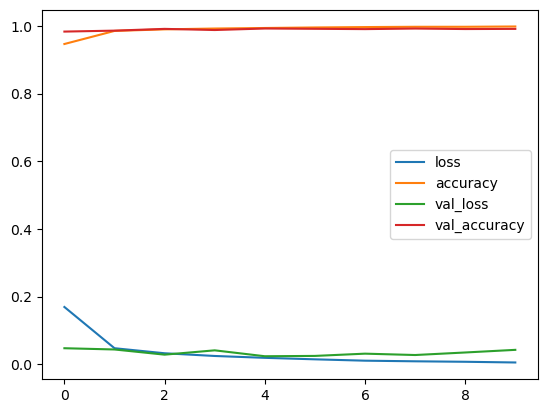

In [25]:
pd.DataFrame(hist.history).plot()

In [26]:
x_new=X_test[:100]

In [27]:
actual=y_test[:100]
actual

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [28]:
y_prob=model.predict(x_new)

4/4 [==============================] - 0s 4ms/step


In [29]:
y_pred=np.argmax(y_prob,axis=-1)

In [30]:
y_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])

In [31]:
actual

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [32]:
i=np.where(actual==1)

In [33]:
i[1:]

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
        6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
        3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
        6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
        6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9]),)

In [34]:
y_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9])

In [35]:
y_pred-i[1:]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])